**BREAST_CANCER_PREDICTION_MODEL**

*PROBLEM STATEMENT*

Breast cancer is the most common type of cancer in women. When cancers are found early, they can often be cured. There are some devices that detect the breast cancer but many times they lead to false positives, which results is patients undergoing painful, expensive surgeries that were not even necessary. These type of cancers are called **benign** which do not require surgeries and we can reduce these unnecessary surgeries by using Machine Learning. We take a dataset of the previous breast cancer patients and train the model to predict whether the cancer is benign or malignant. These predictions will help doctors to do surgeries only when the cancer is **malignant**, thus reducing the unnecessary surgeries for woman.
In this we have ten  real valued features are computed for  each cell nucleus:
radius,texture,perimeter,area,smoothness,compactness,concavity,cocave points,symmetry,fractal dimension



*STEPS TO CREATE A MODEL*<br>
     1.collecting the data<br>
     2.preprocessing the data<br>
     3.visualization<br>
     4.splitting the dataset(training and testing data)<br>
     5.predicting the data 

# collecting the data #


In [1]:
                                #1.COLLECTING THE DATA
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN



In [2]:
#read the data
data=pd.read_csv("C:/Users/APARNA/Downloads/data.csv")

In [3]:
#let's print the data
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,unnamed
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,NaN


In [4]:
#shape of the dataset
print("shape of the dataset:",data.shape)

shape of the dataset: (569, 13)


In this dataset we have 569 rows and 33 columns are there<br>
ATTRIBUTE::<br>
id(unique id of the patients),<br> 
diagnosis(M-malignant(*it is harmful*),B-benign(*not harmful*)),<br>
radius_mean,<br>
texture_mean,<br> 
area_mean,<br>
smoothness_mean,<br>
compactness_mean,<br> 
concavity_mean,<br> 
concave points_mean,<br>
symmetry_mean<br>
fractal_dimension_mean<br>

Unnamed: 32

In [5]:
#let's see the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  unnamed                 0 non-null      float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.9+ KB


 # PREPROCESSING THE DATA 

In [6]:
                                 #PREPROCESSING THE DATA
#let's check for whether there are any null values in the dataset or not
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,unnamed
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,True


By considering the bove output<br> 
FALSE represnting no null value <br>
TRUE representing null value

In [7]:
#let's see sum of  null values present in each column
print("sum of null values present in each column:",data.isnull().sum())

sum of null values present in each column: id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
unnamed                   569
dtype: int64


In [8]:
#now let's see total null values present in whole dataset
print("total null values present in whole dataset:",data.isnull().sum().sum())

total null values present in whole dataset: 569


In [9]:
#In this dataset we have Unnamed: 32 column having all null values
#so now I removing the Unnamed: 32 column from the dataset
data.drop("unnamed",axis=1,inplace=True)

In [10]:
#After removing the Unnamed: 32 column
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [11]:
#let's see the shape of the dataset after dropping the column
print("shape of the dataset after dropping the column:",data.shape)

shape of the dataset after dropping the column: (569, 12)


In [12]:
#let's check for still is there any null values in dataset
data.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [13]:
#no null values or NAN values in the dataset

In [14]:
#let's see the categorical column diagnosis
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

from the above output we can observe that benign(357) values are greater than malignant(212)

 # VISUALIZATION

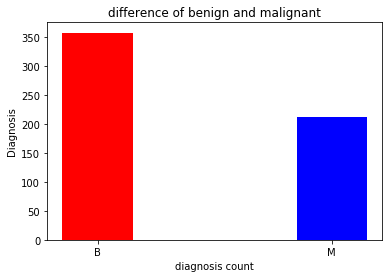

In [15]:
                                 #3.VISUALIZATION

#let's see the count of diagnosis using visualization(bar graph)
x=["B","M"]
y=data["diagnosis"].value_counts()
plt.title("difference of benign and malignant")
plt.xlabel("diagnosis count")
plt.ylabel("Diagnosis")
plt.bar(x,y,width=0.3,color=["r","b"])
plt.show()



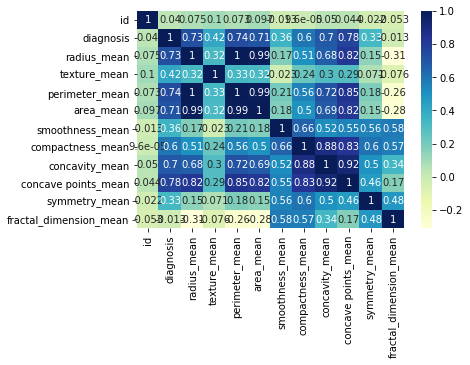

In [55]:
plot=sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()

In [18]:
                                
#we have one categorical feature, so we need to convert it into numeric values using
#i am importing the labelencoder from sklearn library to convert categorical values to numerics
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data["diagnosis"] = encode.fit_transform(data["diagnosis"])

In [19]:
#let's print the categorical column diagnosis after converted to numericalvalues
data["diagnosis"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int32

In [20]:
#now we check the whole dataset
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884


In [21]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# splitting the data

In [22]:
                                
#importing train_test_split to create validation test
from sklearn.model_selection import train_test_split  

In [23]:
#before splitting we have to take feature which we have to train the model
#first i am going to print all the columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [24]:
correlation=data.corr()
correlation

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917


In [56]:
#now take independent and dependent variables

prediction_feature = ['radius_mean', 'perimeter_mean','area_mean', 'compactness_mean',
                      'concavity_mean','concave points_mean']
#independent variable x
x=data[prediction_feature]
x



,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790
3,11.42,77.58,386.1,0.28390,0.24140,0.10520
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791
566,16.60,108.30,858.1,0.10230,0.09251,0.05302
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200


In [26]:
#independent variable x
x=data[prediction_feature]
x

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790
3,11.42,77.58,386.1,0.28390,0.24140,0.10520
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791
566,16.60,108.30,858.1,0.10230,0.09251,0.05302
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200


In [27]:
#dependent variable y
target_feature = 'diagnosis'
y=data[target_feature]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [28]:
#Split the dataset into TrainingSet and TestingSet 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.33)

In [29]:
#printing the x_train
x_train

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
274,17.93,115.20,998.9,0.07027,0.05699,0.04744
189,12.30,78.83,463.7,0.07253,0.03844,0.01654
158,12.06,76.84,448.6,0.05241,0.01972,0.01963
257,15.32,103.20,713.3,0.22840,0.24480,0.12420
486,14.64,94.21,666.0,0.06698,0.05192,0.02791
...,...,...,...,...,...,...
85,18.46,121.10,1075.0,0.10530,0.13350,0.08795
199,14.45,94.49,642.7,0.12060,0.11800,0.05980
156,17.68,117.40,963.7,0.16650,0.18550,0.10540
384,13.28,85.79,541.8,0.08575,0.05077,0.02864


In [30]:
print("shape of the x_train")
x_train.shape

shape of the x_train


(381, 6)

In [31]:
#x_test printing
x_test.tail(10)

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
258,15.66,110.20,773.5,0.31140,0.31760,0.13770
84,12.00,76.95,443.3,0.07165,0.04151,0.01863
408,17.99,117.80,991.7,0.13040,0.12010,0.08824
498,18.49,121.30,1068.0,0.13170,0.14910,0.09183
468,17.60,119.00,980.5,0.20040,0.21360,0.10020
218,19.80,129.70,1230.0,0.13060,0.12720,0.08691
24,16.65,110.00,904.6,0.14570,0.15250,0.09170
530,11.75,75.89,422.9,0.09713,0.05282,0.04440
204,12.47,81.09,481.9,0.10580,0.08005,0.03821
38,14.99,95.54,698.8,0.05131,0.02398,0.02899


In [32]:
print("shape of the x_test:",x_test.shape)

shape of the x_test: (188, 6)


In [33]:
#printing y_train
y_train

274    1
189    0
158    0
257    1
486    0
      ..
85     1
199    1
156    1
384    0
456    0
Name: diagnosis, Length: 381, dtype: int32

In [34]:
print("shape of the y_train:",y_train.shape)

shape of the y_train: (381,)


In [35]:
#printing y_test
y_test

350    0
222    0
141    1
447    0
103    0
      ..
218    1
24     1
530    0
204    0
38     1
Name: diagnosis, Length: 188, dtype: int32

In [36]:
print("shape of the y_train:",y_test.shape)

shape of the y_train: (188,)


we can observe that from above outputs<br>
x_train and y_train have same number of rows that is 381 rows<br>
x_test and y_test have same number of rows that is 188


# Model implementation

                                 **K-NEAREST NEIGHBORS**

In [37]:
#importing knn classifier 
from sklearn.neighbors import KNeighborsClassifier as KNN

In [38]:

#creating instance(point) of knn
clf=KNN(n_neighbors=10)
#fitting the model
clf.fit(x_train,y_train)
#predicting over the train set and calculating f1
predict_test=clf.predict(x_test)
k=f1_score(predict_test,y_test)
print("test f1_score",k)

test f1_score 0.8307692307692308


In [39]:
def Elbow(K):
    #initiating empty list
    test_error=[]
    
    #training model for every value of k
    for i in k:
        #instance of knn
        clf=KNN(n_neighbors=i)
        clf.fit(x_train,y_train)
        #appending f1 score to empty list calculated using the predictions
        tmp=clf.predict(x_test)
        tmp=f1_score(tmp,y_test)
        error=1-tmp
        test_error.append(error)
    return test_error

In [40]:
#defining k range
k=range(1,50,2)

In [41]:
#calling above defined function
test=Elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

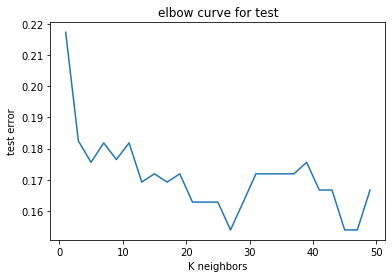

In [42]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("K neighbors")
plt.ylabel("test error")
plt.title("elbow curve for test")

Before performing elbow method I had taken 10 neighbors  then it's f1_score is 0.821<br>
After performing elbow method to increase accuracy:<br>
From the graph we should consider minimum value in graph that is may be 3  as our number of nearest neighbors<br>



In [43]:
#creating instance(point) of knn
clf=KNN(n_neighbors=27)
#fitting the model
clf.fit(x_train,y_train)
#predicting over the train set and calculating f1
predict_test=clf.predict(x_test)
k=f1_score(predict_test,y_test)
print("test f1_score",k)

test f1_score 0.8461538461538461


*As we know in KNN if we increase the number of neighbors the accuracy of prediction also increases* <br>
if we take k value as 3 the f1_score will be 0.846<br>
the accuracy of prediction has increased<br>

# prediction

In [44]:
input=np.array([[12.00,76.95,443.3,0.07165,0.04151,0.01863]])


In [45]:
if clf.predict(input)==0:
    print("benign (not much serious)")
else: 
    print("malignant(need to take immediate treatment)")
    

benign (not much serious)


In [46]:
display(data.loc[[84]])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
84,8612080,0,12.0,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968


# DECISION TREE

In [47]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf= DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.9148936170212766


In [49]:
input=np.array([[12.00,76.95,443.3,0.07165,0.04151,0.01863]])
if clf.predict(input)==0:
    print("benign (not much serious)")
else: 
    print("malignant(need to take immediate treatment)")


benign (not much serious)


# XGBOOST ALGORITHM

In [50]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [51]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)
y_pred=xgb_clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.9361702127659575

In [52]:
input=np.array([[12.00,76.95,443.3,0.07165,0.04151,0.01863]])
if clf.predict(input)==0:
    print("benign (not much serious)")
else: 
    print("malignant(need to take immediate treatment)")

benign (not much serious)


# Naive bayes algorithm

In [53]:
from sklearn.naive_bayes import GaussianNB  


In [54]:
classifier = GaussianNB()  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)  
accuracy_score(y_pred,y_test)

0.9042553191489362

# conclusion

We had seen the data importing,cleaning,filtering using pandas methods and show some visual graphs using matplotlib and seaborn to know the behaviour of this dataset.<br>
And we trained the model,make prediction and it's accuracy scores using KNN and decisiontree classifier.<br>
KNN giving the accuracy 0.846.<br>
And decision tree giving 0.914<br>
we can say that to predict the breast cancer decision tree classifier is the best algorithm.
